In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as fft

In [2]:
#set parameters and initial conditions
numpoints=1000
numbinsx=16
numbinsy=16
deltat=0.1
vt0=np.zeros((2,numpoints))
points=np.random.normal(loc=4,scale=2,size=(2,round(numpoints/2)))
points=np.append(points,np.random.normal(loc=-4,scale=2,size=(2,round(numpoints/2))),axis=1)

In [3]:
#create bins
_,xedges,yedges=np.histogram2d(points[0],points[1],bins=(numbinsx,numbinsy)) #don't need the counts yet
deltax=xedges[1]-xedges[0]
deltay=yedges[1]-yedges[0]
binarea=deltax*deltay

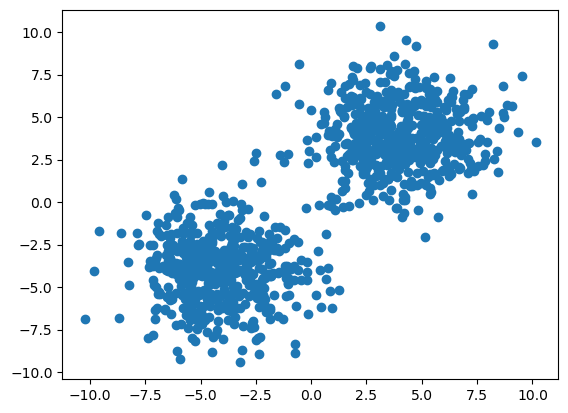

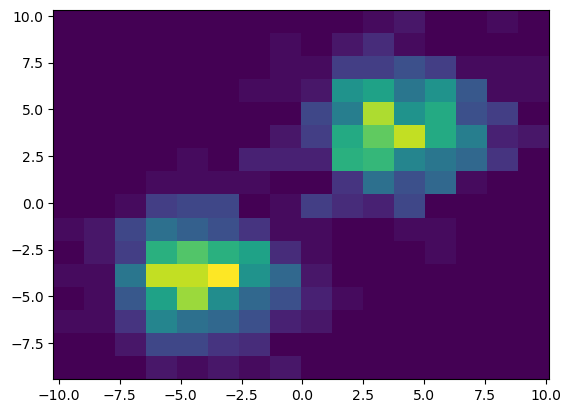

In [4]:
#do some plots to visualize initial conditions
plt.scatter(points[0],points[1])
plt.show()
plt.hist2d(points[0],points[1],bins=[xedges,yedges])
plt.show()

In [5]:
#stuff that needs to be done every loop
counts=np.histogram2d(points[0],points[1],bins=(xedges,yedges))[0] #only need the counts now since edges are fixed
density=counts/binarea
fftdensity=fft.fft2(density)
k=fft.fftfreq(numbinsx,deltax)
l=fft.fftfreq(numbinsy,deltay)
fftpotential=np.zeros((numbinsx,numbinsy),dtype=complex)
for i in range(numbinsx):
    for j in range(numbinsy):
        if k[i]==0 and l[j]==0:
            fftpotential[i,j]=0
        else:
            fftpotential[i,j]=-fftdensity[i,j]/(k[i]**2+l[j]**2)

potential=np.fft.ifft2(fftpotential).real
potentialghosts=np.pad(potential, pad_width=1, mode='edge')
gradx,grady=np.gradient(potentialghosts, deltax, deltay)
vt1=np.zeros((2,numpoints))
xlabels=np.digitize(points[0,:].round(5),xedges.round(5),right=True)
ylabels=np.digitize(points[1,:].round(5),yedges.round(5),right=True)
for i in range(numpoints):
    ixbin=xlabels[i]
    iybin=ylabels[i]
    vt1[0,i]=vt0[0,i]-deltat*gradx[ixbin,iybin] #update velocity by adding acceleration (negative potential gradient times deltat)
    vt1[1,i]=vt0[1,i]-deltat*grady[ixbin,iybin]

pointsnext=points+vt1*deltat

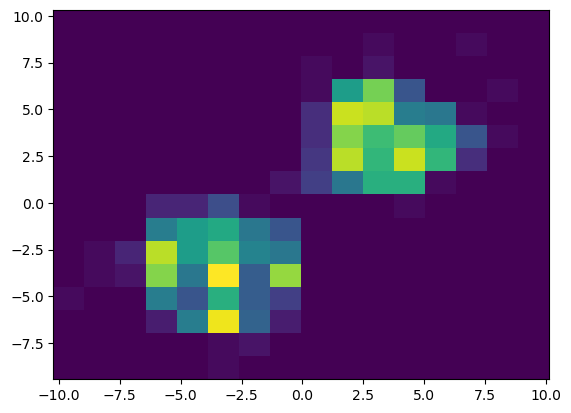

In [14]:
plt.hist2d(pointsnext[0,:],pointsnext[1,:],[xedges,yedges])
plt.show()